# BEE313 Problem 4.1

## Objective 
The objective of this problem was to determone the total volume of water on in the stream over a 7-hour period. It was known that there was a 5 hour rain even in this period, and that the tracer concentration was recorded in order to determine the amount of water that originated from rainfall.

q = [0.02, 0.06, 0.12, 0.08, 0.04, 0.03, 0.02]

δD = [-11, -6, -5, -8, -9, -10, -11]

Equation:

$ q = q^*((C_t - Cbase)/(Cevent - Cbase))$

## Methods:
First converted the flow rates into volumes per hour since each rate of m^3/s was per hour. Additionally, the above equation was used in order to compute the final q that would be representative of the amount of water that originated from the rainfall.


In [20]:
# Import statements
import numpy as np


#sum(q*) = q(t)*((c(t) - Cb)/ (Cevent - Cbase))
### Not sure if the above equation is correct... still not entirely sure about the Cbase and Cevent and I am think that in the case of this...
###### C(t) -> 

q = np.array([0.02*60*60, 0.06*60*60, 0.12*60*60, 0.08*60*60, 0.04*60*60, 0.03*60*60, 0.02*60*60]) # converted such that it is the amount of water that has fell within an hour
# assumed the c_t is all concentrations
c_t = np.array([-11, -6, -5, -8, -9, -10, -11])
# assumed Cevent is only concentrations from 2 hours and on
Cevent=-4
# assumed that Cbase was -11, baseflow occurance
Cbase = -11

### GUESSS...
##### took the concnetation and subtracted from base value then summed to create a fraction of sorts...
##### then I multiplied that by q..
##### Then I summed the array
##### This generated a value for total volume of water in the stream during this period that originated from rainfall from this storm
q_star = q*(((c_t - Cbase))/((Cevent - Cbase)))
print(q_star)
vol = np.sum(q_star)
print(f'Volume: {vol:.3f} m^3')

[  0.         154.28571429 370.28571429 123.42857143  41.14285714
  15.42857143   0.        ]
Volume: 704.571 m^3


## Results:
The total volume of water in the stream during this period that originated from rainfall from this storm was found to be 704 $m^3$

## Discussion:
Initially I determined the flow rate by not accounting for the fact that the rates within each hour need to be converted into a volume form to then determine how much in total volume of water was resulted from the rain. It would make sense that roughly 50% of the volume is attributed to the rainfall. We don't know much else about this system, but rainfall is usually a significant input into hydrologic systems.


# BEE313 Problem 4.2

## Objective :

The objective for this problem was to determine the peak flow due to a 85mm storm event, with respect to the following condtions. It was known that the storm lasted 2.5 hours

| Landcover           |            Soil        |  Area (sq mi) |  Fraction of Total area | Condition II Curve number |
|---------------------|------------------------|---------------|-------------------------|---------------------------|
| good  pasture       |  Sandy Loam (Group B)  |        4      |          .4             |             61            |
| fair woodlands      |  Sandy Loam (Group B)  |        6      |          .6             |             60            |

Curve numbers were found in table 10.11 of the Physical Hydrology Textbook...



Watt and Chow formula was used... to compute time of concentration
$Tc = .128*((L/((S_c)^.5))^.47)$
* Sc =  sine of channel slope angle (unitless)
* L = length of main stream (km)
* Tc = time of conentration (hr)

For time of rise 
$Tr = (0.5*TP_star) + (0.6*Tc)$
* TP_star = the duration of excess rainfall (hr)
* Tc = time of concentration estimated from Watt and Chow (hr)

Peak Flow Equation:

$qpk = (.208*P_star*A)/(Tr)$
* A = total area (km^2)
* qpk = peak flow (m^3/s)
* P_star = effective rainfall (m)


## Methods:
The proper conditions were determined using the Physical Hydology textbook. The weighted average curve number was then found. Next, the watershed storage capacity was found. Then using this the effective rainfall was determined. Additionally, the concentration time was determined using the Watt and Chow formula. With this concentration time it was plugged into the time of rise equation. Finally the peak flow was calculated. 

In [21]:
# Objective: Find the peak flow with respect to the storm

# stream characteristics
### sine of channel slope angle
S_c = .06 # percentage 6%
### stream length
L = 8 # km

#storm
### total rainfall (P)
P = 85 #mm
### duration of the even
TP_star = 2.5 #hours

# average wetness of soil...

# areas
past_area = 4 # km
wood_area = 6 #km
### Total Area
A = 10

frac_past = past_area/A
frac_wood = wood_area/A

# Curve #
CN_past = 61
CN_wood = 60

# Step 1: Compute the weighted average curve number
CN_weight = (CN_past*frac_past) + (CN_wood*frac_wood)

# Step 2: Determine Smax...
### Smax is the watershed storage capacity that incorporates all watershed storage... including the interception, surface and subsurface storage. 
Smax = (25400/CN_weight)-254

# Step 3: Determine the effective rainfall
P_star = ((P-(.2*Smax))**2)/(P+(.8*Smax))


print(" "*3)
# Step 4: Estimate teh Concentration Time
## Watt and Chow formula was used...
Tc = .128*((L/((S_c)**.5))**.79)

# Step 5: Calculated the time to rise
Tr = (0.5*TP_star) + (0.6*Tc)

# Step 6: Calculated the Peak Flow 
qpk = (.208*P_star*A)/(Tr)
print(f'Peak Flow {qpk:.3f} m^3/s')

## Comparision of precipiration values from prior problem and this one.. mm/hr
event_text = 107/3.4
event_p2 = P/TP_star
print(event_text)
print(event_p2)

   
Peak Flow 10.370 m^3/s
31.47058823529412
34.0


## Results
The peak flow with respect to the 85mm storm event was found to be $10.370 m^3/s$

## Discussion:
I compared this value to the textbook example which had a similar rate of rainfall. However, it was over a smaller area which likely would impact the overall volume due to differences in surface area. Additionally the land cover differente between these examples. This problem had a soil that allowed for fast drainage due to the sandy loam. The textbook problem had a wide variety of soil types which is why the overall peak flow may have been less, because the weighted curve number was lower than in this problem.


# BEE313 Problem 4.3

## Objective:
The objective of this problem was to determine the peak flow out of the catchment and when it occurred. This was based on a known event flow at 1cm if effective precipitation that made a half hour storm unit hydrograph. Additionally, the expected peak flow was determined while under 2 different half hour events of 1.5 cm starting at 8am and 2.5cm starting at 10am. 

q_star = [0,3.5, 17.5, 8.75, 5.25, 3.25, 1.5]

## Methods:
Determined the two arrays for the 1.5 and 2.5 event flows based on the unit hydrograph event flows. Then plotted these values by scaling the 2.5cm event time by 2 so that it would end at the 8th hour. Then in order to combine these flows to make a total flow array they were combined at the points in time when the flows were present. These was performed using a for loop. Finally the total flow was plotted over the 8 hour period, and then the max peak flow was determined. 

[ 0.     3.75  26.25  21.875 51.625 26.75  15.375  8.125  3.75 ]
Peak Outflow: 51.625 m^3/s
Peak Outflow Time: 4 hours


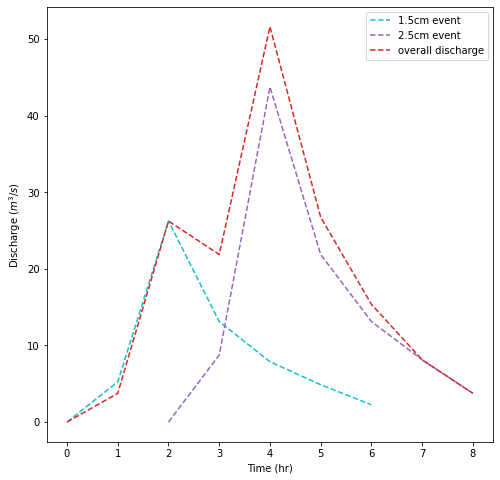

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
# based on a storm unit hydrograph


### t is time after storm begins....

# Generate the two arrays for half hour storm unit hydrograph...
##### 1 unit = 1 cm of effective precip
## q* is the eventflow for that hour..
q_star = np.array([0,3.5, 17.5, 8.75, 5.25, 3.25, 1.5])
## time after storm begins
t = np.array([0,1,2,3,4,5,6])

p_star1_5 = 1.5 # cm
p_star2_5 = 2.5 # cm

# Based on above hydrograph...
## If 1.5 cm of effective precip fall during a half hour storm that starts at 8am 
## and 2.5 cn of effective precip falls during a half hour storm event that starts at 10am...

## Baseically what will be done is the preipication will be multiplied by the qstar
### And then it will be determined when the expected peak flow out of catchment is and when it occurs

fig=plt.figure()
fig.set_size_inches(8,8,8)

# Step 1: Find inital peak flow...
ax3 = fig.add_subplot(111)
# ## found max value in this array...
# init_max_index = np.where(q_star == np.max(q_star))[0][0]
# tinit_max = t[init_max_index]
# q_starinit_max =q_star[init_max_index]

# ax3.plot(t, q_star, '--', color='tab:red')
# ax3.plot(tinit_max, q_starinit_max,'b.', markersize = 12, label = "peak discharge initial")

# Step 2: Find the response hydrograph for effective rainfall of 1.5 cm. 
# ## Found the peak flow for this...
time_8 = 8 # am
q_star2 = q_star*p_star1_5

## found max value in this array...
#init_max_index2 = np.where(q_star2 == np.max(q_star2))[0][0]
#tinit2_max = t[init_max_index2]
#q_star2init_max =q_star2[init_max_index2]

ax3.plot(t, q_star2, '--', color= 'tab:cyan', label = '1.5cm event')
#ax3.plot(tinit2_max, q_star2init_max,'m.', markersize = 12, label = "peak discharge at 1.5cm")


# Step 3: Find the response hydrograph for effective rainfall of 2.5 cm. 
# ## Found the peak flow for this...
time_10 = 10 # am ...
q_star3 = q_star*p_star2_5
t_10 = t+2
### HOWEVER IF 8am is set to be time at 1... then 10am is set to be time at 3 so from 
## found max value in this array...
# init_max_index3 = np.where(q_star3 == np.max(q_star3))[0][0]
# tinit3_max = t[init_max_index3]
# q_star3init_max =q_star3[init_max_index2]

ax3.plot(t_10, q_star3, '--', color= 'tab:purple', label = "2.5cm event")
#ax3.plot(tinit3_max, q_star3init_max,'g.', markersize = 12, label = "peak discharge at 2.5cm")


# Step 4: Added the two arrays together to generate a plot for the total flow
t_total = np.arange(0,9)
q_total = np.empty(len(t_total))
for t in t_total:
    # Event for 8am starts here but hasn't been an hour yet so flow is 0
    if t==0:
        q_total[t]=0
    # At t = 1 there is going to be 9am, only first rain event...
    # From t =2 this is 10am when next event starts... but still hasn't had 1 hour of rain for the 2.5cm event\
    ## account for this by adding the zero flow rate..
    elif t>1  and t<=2:
        q_total[t]=q_star2[t]+q_star3[t-2]
    # Now from t = 3 to t = 6 both events will be happening
    ## Decreasin q_star 3 by 2 to get the proper points after zero flow...
    elif t>=3 and t<=6:
        q_total[t] = q_star2[t] + q_star3[t-2]
    else:
        q_total[t]=q_star3[t-2]
print(q_total)

ax3.plot(t_total, q_total, '--', color= 'tab:red', label = "overall discharge")


# Step 5: Compared Peak flows and their times... to determine peak flow and at what time
# Found the max flow rate..
init_max_index = np.where(q_total == np.max(q_total))[0][0]
# Associated the max flow rate index to the time...
t_max = t_total[init_max_index]
# Flow Rate Associated with this poiint in time...
q_max =q_total[init_max_index]

print(f'Peak Outflow: {q_max} m^3/s')
print(f'Peak Outflow Time: {t_max} hours')
## got the proper time
# pk_time = time(time_10+tinit3_max)
# print(f'Time of Peak Outflow: {pk_time} pm')

##relevant axes and legend
ax3.legend()
ax3.set_xlabel('Time (hr)')
ax3.set_ylabel('Discharge ($m^3/s$)')
plt.show()

## Results:
The peak outflow was found to be 51.625 m^3/s at 4 hours.

## Discussion:
It can be seen that the due to the lag of two hours between the events that the peak occurs later in time. This may not have been the case if the two events were assumed to have been occuring at the same time and had effected the same watershed. However, becaue they occurred at separate times the peak flow was shifted as such with the time and is skewed to the right due to the large volume of water deposited by the 2.5 cm event.

# BEE313 Problem 4.4

## Objective:

Objective was to determine the peak flow out of the rach that had 1cm in depth routed througn 6km reach with a slope of 2.5%. The depth of the water in the reach was known to be 1.5m and the roughness of the channel was also known to be .05.

## Methods:
Determined the flow velocity. Then determined the flood wave velocity. Afterwhich point the travel time was computed. As done before the time of concentration and time of rise were computed as well. The time of rise was needed in rder to determine the time step. One fifth of the time of rise was taken to determine the time step. However, because the time step needed to be less than this value and the travel time, it was subtracted by .01 to get the time step. Next the routing coefficient was computed with this time step and travel time. Finally, the values were interpolated, and the output flows were generated. The peak outflow was determined through indexing and the values were plotted to showcase the trend.

0.26814105751873846
1.1621090599481485
Peak Flow out of Reach 16.283 m^3/s


Time of Peak Flow out of Reach 2.181 hr




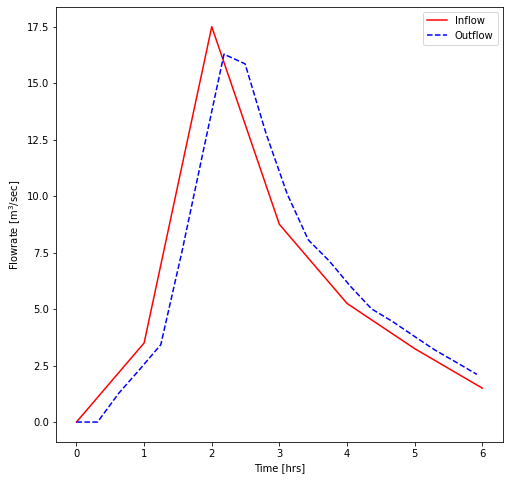

In [23]:
import numpy as np
# knowns

## Storm
p_star = 1 #cm

## Hydrograph
## q* is the eventflow for that hour..
q_star = p_star*(np.array([0,3.5, 17.5, 8.75, 5.25, 3.25, 1.5])) # m^3/s
## time after storm begins
t = np.array([0,1,2,3,4,5,6])

## Reach Characteristics
#### Length (X) m
X = 6*1000 # m
#### Depth of discharge
y = 1.5  #m
#### slope
s = .025 # %
#### Mannings coefficient
n_M = .05
# unit conversion factor
epsilon = 1 # m^(1/3)
# Tp
Tp = .5
# Step 1: determine flow velocity:
u = (epsilon/n_M)*(y**(2/3))*(s**(1/2))
#print(f"flow velocity {u:.3f} m/s")

# Step 2: determine the flood wave velocity
U_flood = 1.5*u
#print(f"flood wave velocity {U_flood:.3f} m/s")

# Step 3: Determine travel time for the reach... T_star
T_star = (X/U_flood)/3600 # hours
print(T_star)
#print(f"Travel Time for the reach {T_star:.3f} hr")
# Step 4: Estimate teh Concentration Time
## Watt and Chow formula was used...
Tc = .128*(((X/1000)/((s)**.5))**.79)
# Step 5: Calculated the time to rise
Tr = (0.5*Tp) + (0.6*Tc)
#print(f"Travel Time for rise {Tr:.3f} hr")
# Step 6: routing time step
### Δt must be less than T* and less than 1/5 the time of rise
### of the inflow hydrograph
##### Time for rise is .558, and time for travel is .268
####### Subtracted .01 to get
fifth_tr = ((1/5)*(Tr))-.01
#print(fifth_tr)
###### fifth_tr is less than T_star... so use this value as time step...

### Timestep...
delta_t = fifth_tr
# Step 7: Compute Routing Coefficient:
CX = delta_t/T_star
print(CX)
#print(f'Routing Coefficient {CX:.3f} hr')

# Step 8: 
#### Using interpolation to find the points between points...
### Apply the equation 10.56.. to determing outflow hydrograph
# interpolate to a fine timescale
timeFine = np.arange(0, 6, delta_t)
qInFine = np.interp(timeFine, t,q_star)

qOutFine = qInFine*0

# Translate the flow down the reach in time.
for i in np.arange(0,len(timeFine)-1):
    qOutFine[i+1] = CX*qInFine[i] + (1-CX)*qOutFine[i]

# peak outflow
pk_flow_idx = np.where(qOutFine==np.max(qOutFine))[0][0]
time_pk = timeFine[pk_flow_idx]
pkflow_rch = qOutFine[pk_flow_idx]
print(f'Peak Flow out of Reach {pkflow_rch:.3f} m^3/s')
print("\n")
print(f'Time of Peak Flow out of Reach {time_pk:.3f} hr')
print("\n")
fig=plt.figure()
fig.set_size_inches(8,8,8)
ax4 = fig.add_subplot(111)
ax4.plot(t,q_star,'r-',label='Inflow')
ax4.plot(timeFine,qOutFine,'b--',label='Outflow')
ax4.set_xlabel('Time [hrs]')
ax4.set_ylabel('Flowrate [m$^3$/sec]')
ax4.legend()
plt.show()

## Results
The time of peak flow out of the reach is 2.181 hours, and this peak flow was found to be 16.283 m^3/s.

## Discussion
This value makes logical sense tp ne less than the inflows because of the fact that there will be losses associated with the channel roughness, diversion, soil retention, and also evapotranspiration. This model doesn't necessarily account for this but this is important to recognize as the trend is examined and that we cannot clearly see the presence of these losses. 